In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [55]:
application_train_data = pd.read_csv('application_train.csv', sep=',')
application_train_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


# Nettoyage du jeu de données : Application_train.csv

In [5]:
application_train_data.shape

(307511, 122)

In [6]:
for index,column in enumerate(application_train_data.columns):
        print(index,column)  

0 SK_ID_CURR
1 TARGET
2 NAME_CONTRACT_TYPE
3 CODE_GENDER
4 FLAG_OWN_CAR
5 FLAG_OWN_REALTY
6 CNT_CHILDREN
7 AMT_INCOME_TOTAL
8 AMT_CREDIT
9 AMT_ANNUITY
10 AMT_GOODS_PRICE
11 NAME_TYPE_SUITE
12 NAME_INCOME_TYPE
13 NAME_EDUCATION_TYPE
14 NAME_FAMILY_STATUS
15 NAME_HOUSING_TYPE
16 REGION_POPULATION_RELATIVE
17 DAYS_BIRTH
18 DAYS_EMPLOYED
19 DAYS_REGISTRATION
20 DAYS_ID_PUBLISH
21 OWN_CAR_AGE
22 FLAG_MOBIL
23 FLAG_EMP_PHONE
24 FLAG_WORK_PHONE
25 FLAG_CONT_MOBILE
26 FLAG_PHONE
27 FLAG_EMAIL
28 OCCUPATION_TYPE
29 CNT_FAM_MEMBERS
30 REGION_RATING_CLIENT
31 REGION_RATING_CLIENT_W_CITY
32 WEEKDAY_APPR_PROCESS_START
33 HOUR_APPR_PROCESS_START
34 REG_REGION_NOT_LIVE_REGION
35 REG_REGION_NOT_WORK_REGION
36 LIVE_REGION_NOT_WORK_REGION
37 REG_CITY_NOT_LIVE_CITY
38 REG_CITY_NOT_WORK_CITY
39 LIVE_CITY_NOT_WORK_CITY
40 ORGANIZATION_TYPE
41 EXT_SOURCE_1
42 EXT_SOURCE_2
43 EXT_SOURCE_3
44 APARTMENTS_AVG
45 BASEMENTAREA_AVG
46 YEARS_BEGINEXPLUATATION_AVG
47 YEARS_BUILD_AVG
48 COMMONAREA_AVG
49 ELEVATORS_AV

In [53]:
def showMissingValues(data, thresh=20, color='black', edgecolor='black', width=15, height=3):
    
    plt.figure(figsize=(width,height))
    percentage=(data.isnull().mean())*100
    percentage.sort_values(ascending=False).plot.bar(color=color, edgecolor=edgecolor)
    plt.axhline(y=thresh, color='r', linestyle='-')
    plt.title('Pourcentage de valeurs manquantes par colonne', fontsize=20, weight='bold' )
    plt.text(len(data.isnull().sum()/len(data))/1.7, thresh+12.5, 'Colonne avec plus de %s%s valeurs manquantes' %(thresh, '%'), fontsize=12,weight='bold', color='crimson',
         ha='left' ,va='top')
    plt.text(len(data.isnull().sum()/len(data))/1.7, thresh - 5, 'Colonne avec moins de %s%s valeurs manquantes' %(thresh, '%'), fontsize=12,weight='bold', color='blue',
         ha='left' ,va='top')
    plt.xlabel('Colonne', size=15, weight='bold')
    plt.ylabel('Pourcentage de valeurs manquantes', weight='bold')
    plt.yticks(weight ='bold')
    
    return plt.show()

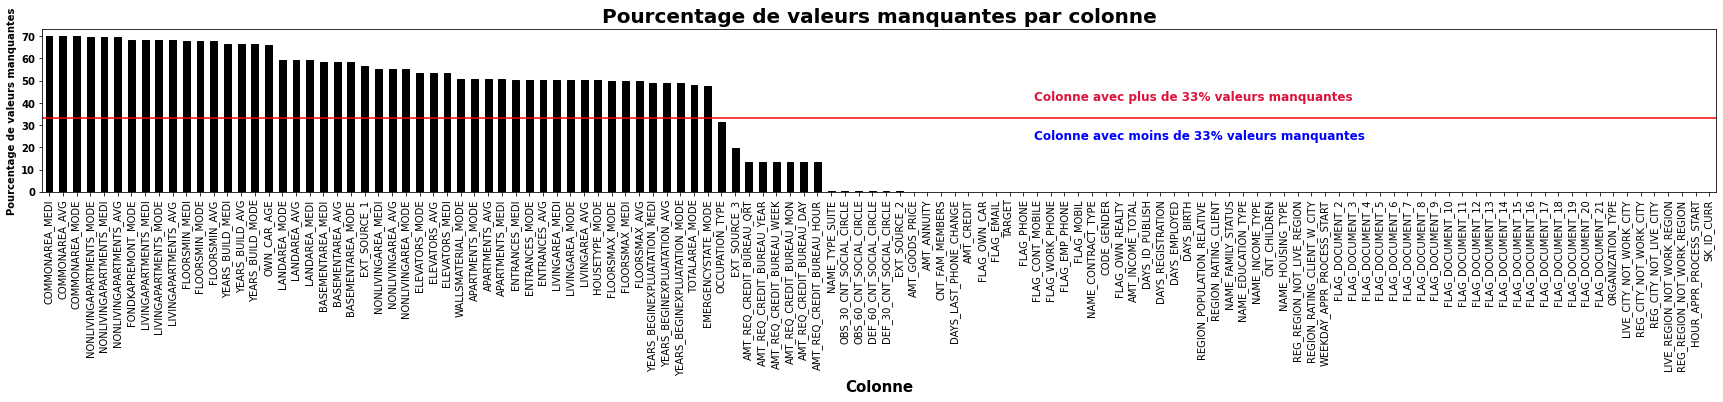

In [54]:
showMissingValues(application_train_data,33, width= 30)

In [60]:
#Retrait des columns avec moins de 33% de valeurs
application_train_data_filtered = application_train_data.copy()

for index,column in enumerate(application_train_data.columns):
        if(application_train_data[column].isnull().mean()*100 > 33):
            application_train_data_filtered = application_train_data_filtered.drop([column], axis=1)             

In [61]:
application_train_data_filtered.fillna(0)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [66]:
for index,column in enumerate(application_train_data_filtered.columns):
        print(index,column)  

0 SK_ID_CURR
1 TARGET
2 NAME_CONTRACT_TYPE
3 CODE_GENDER
4 FLAG_OWN_CAR
5 FLAG_OWN_REALTY
6 CNT_CHILDREN
7 AMT_INCOME_TOTAL
8 AMT_CREDIT
9 AMT_ANNUITY
10 AMT_GOODS_PRICE
11 NAME_TYPE_SUITE
12 NAME_INCOME_TYPE
13 NAME_EDUCATION_TYPE
14 NAME_FAMILY_STATUS
15 NAME_HOUSING_TYPE
16 REGION_POPULATION_RELATIVE
17 DAYS_BIRTH
18 DAYS_EMPLOYED
19 DAYS_REGISTRATION
20 DAYS_ID_PUBLISH
21 FLAG_MOBIL
22 FLAG_EMP_PHONE
23 FLAG_WORK_PHONE
24 FLAG_CONT_MOBILE
25 FLAG_PHONE
26 FLAG_EMAIL
27 OCCUPATION_TYPE
28 CNT_FAM_MEMBERS
29 REGION_RATING_CLIENT
30 REGION_RATING_CLIENT_W_CITY
31 WEEKDAY_APPR_PROCESS_START
32 HOUR_APPR_PROCESS_START
33 REG_REGION_NOT_LIVE_REGION
34 REG_REGION_NOT_WORK_REGION
35 LIVE_REGION_NOT_WORK_REGION
36 REG_CITY_NOT_LIVE_CITY
37 REG_CITY_NOT_WORK_CITY
38 LIVE_CITY_NOT_WORK_CITY
39 ORGANIZATION_TYPE
40 EXT_SOURCE_2
41 EXT_SOURCE_3
42 OBS_30_CNT_SOCIAL_CIRCLE
43 DEF_30_CNT_SOCIAL_CIRCLE
44 OBS_60_CNT_SOCIAL_CIRCLE
45 DEF_60_CNT_SOCIAL_CIRCLE
46 DAYS_LAST_PHONE_CHANGE
47 FLAG_DOCUME

In [65]:
application_train_data_filtered.NAME_CONTRACT_TYPE.value_counts()

Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64

In [67]:
application_train_data_filtered.CODE_GENDER.value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [70]:
application_train_data_filtered.isnull().values.any()

True

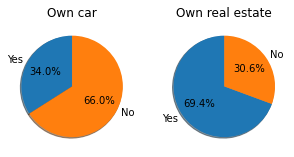

In [62]:
labels = 'Yes', 'No'
cars = application_train_data_filtered.FLAG_OWN_CAR.value_counts(sort=False)
realty = application_train_data_filtered.FLAG_OWN_REALTY.value_counts(sort=False)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(5,5))

ax1.set_title('Own car')
ax1.pie(cars, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

ax2.set_title('Own real estate')
ax2.pie(realty, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

plt.show()